# **Proyecto 3** | Análisis Comparativo de Modelos de Regresión y Clasificación

### Link del Repositorio

* https://github.com/paulabaal12/PROY3-DM

### Integrantes del equipo
- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel) 
- [Juan Pablo Solís - 22102](https://github.com/JPS4321)

## **Propuesta Inicial**

### Planteamiento del Problema

bla bla bla bla

### Metodología Propuesta

bla bla bla bla

### Resultados Esperados

bla bla bla bla

## **Análisis Exploratorio de Datos**

### Importar las librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importar datos

Primero se importan los datos en data frames individuales para analizar los campos de cada archivo antes de juntarlos

In [2]:
data_path = 'data/'
df_lists = []

customers_df = pd.read_csv(data_path + 'olist_customers_dataset.csv')
geolocation_df = pd.read_csv(data_path + 'olist_geolocation_dataset.csv')
order_items_df = pd.read_csv(data_path + 'olist_order_items_dataset.csv')
order_payments_df = pd.read_csv(data_path + 'olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv(data_path + 'olist_order_reviews_dataset.csv')
orders_df = pd.read_csv(data_path + 'olist_orders_dataset.csv')
products_df = pd.read_csv(data_path + 'olist_products_dataset.csv')
sellers_df = pd.read_csv(data_path + 'olist_sellers_dataset.csv')
category_translation_df = pd.read_csv(data_path + 'product_category_name_translation.csv')

df_lists.append(customers_df)
df_lists.append(geolocation_df)
df_lists.append(order_items_df)
df_lists.append(order_payments_df)
df_lists.append(order_reviews_df)
df_lists.append(orders_df)
df_lists.append(products_df)
df_lists.append(sellers_df)
df_lists.append(category_translation_df)

df_names = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers', 'category_translation']

### Obtener información de los data frames

In [10]:
for name, data in zip(df_names, df_lists):
    print(f"--- {name.upper()} ---")
    
    print("-> DIMENSIONS:", data.shape)
    print("-> COLUMNS:", data.columns.to_list())
    print("\nINFO:")
    print(data.info())
    print("\nDESCRIPTIVE STATISTICS:")
    print(data.describe())
    print("\nNULL VALUES:")
    print(data.isnull().sum())
    print("\nUNIQUE VALUES:")
    print(data.nunique())
    print("\n============================\n\n")


--- CUSTOMERS ---
-> DIMENSIONS: (99441, 5)
-> COLUMNS: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

DESCRIPTIVE STATISTICS:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max           

### Resumen de Calidad de Datos por Dataset


#### **CUSTOMERS**
- No hay valores nulos.
- `customer_zip_code_prefix` parece limpio 
- `customer_state` tiene 27 estados únicos.
- No requiere limpieza urgente.

---

#### **GEOLOCATION**
- No hay valores nulos.
- `geolocation_lat` y `geolocation_lng` tienen mucha variabilidad.
- **Nota:** Este dataset no tiene un ID único por fila. Es redundante y opcional de unir.

---

####  **ORDER_ITEMS**
- No hay valores nulos.
- Columna `price`: mínimo de **0.85** y máximo **6735** — revisar si precios bajos son válidos.
- Columna `freight_value`: algunos valores de **0** — posibles envíos gratis?, no parece error grave.
- `order_item_id` tiene valores de 1 a 21 (número de ítems en el pedido).

---

#### **ORDER_PAYMENTS**
- No hay valores nulos.
- `payment_type` es categórica → necesita codificación en el preprocesamiento.
- `payment_value` tiene valores de 0 (posibles errores o pedidos cancelados, revisar más adelante) y max de 13,664.

---

####  **ORDER_REVIEWS**
- Grandes cantidades de valores nulos en:
  - `review_comment_title` (~88% nulo)
  - `review_comment_message` (~58% nulo)
- `review_score` está completo.
- **Nota:** Las columnas de comentario podrían ser eliminadas o tratadas aparte si no son necesarias.

---

#### **ORDERS**
- Valores nulos en:
  - `order_approved_at` (~160 nulos)
  - `order_delivered_carrier_date` (~1783 nulos)
  - `order_delivered_customer_date` (~2965 nulos)
- Podrían ser pedidos no aprobados o cancelados.
- `order_status` es categórica → necesita codificación.

---

#### **PRODUCTS**
- 610 valores nulos en:
  - `product_category_name`
  - `product_name_lenght`
  - `product_description_lenght`
  - `product_photos_qty`
- Solo 2 valores nulos en dimensiones físicas (`weight`, `height`, `length`, `width`). Posiblemente se necesite normalizar los valores.
- Algunos pesos (`product_weight_g`) son **0** — posibles errores (productos mal registrados).

---

#### **SELLERS**
- No hay valores nulos.
- `seller_city` y `seller_state` son categóricas → necesitan codificación.

---

####  **CATEGORY_TRANSLATION**
- No hay valores nulos.
- Traduce las categorías de producto de portugués a inglés.
- Será útil unirlo con `products` en el preprocesamiento.

---

### **Notas Generales:**
- Las variables categóricas (`payment_type`, `order_status`, `seller_state`, etc.) necesitarán codificación.
- Se detectaron columnas con muchos nulos (`review_comment_title`, `review_comment_message`), que pueden ser descartadas o tratadas aparte.
- Algunos datasets como `geolocation` no tienen identificadores únicos y podrían no ser utilizados directamente.


### Obtener las columnas de los datasets

In [4]:
j = 0
for i in df_lists:
    print(f"{df_names[j]} -> columnas: {i.columns.to_list()}")
    j+=1

customers -> columnas: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
geolocation -> columnas: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
order_items -> columnas: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
order_payments -> columnas: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
order_reviews -> columnas: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
orders -> columnas: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
products -> columnas: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_le

En el análisis inicial de las columnas de los datasets se puede observar que:

- `customers` contiene información sobre los clientes, identificados por `customer_id` y `customer_unique_id`.
- `geolocation` proporciona coordenadas de ubicación basadas en códigos postales (`geolocation_zip_code_prefix`), pero no tiene un identificador único para clientes o pedidos.
- `order_items` conecta pedidos (`order_id`) con productos (`product_id`) y vendedores (`seller_id`).
- `order_payments` proporciona detalles de los métodos de pago por `order_id`.
- `order_reviews` almacena reseñas de clientes, ligadas a `order_id`.
- `orders` describe la orden en sí (estado, fechas de entrega, etc.), usando `order_id`.
- `products` ofrece información detallada sobre productos, con `product_id`.
- `sellers` almacena información sobre los vendedores, usando `seller_id`.
- `category_translation` traduce los nombres de categorías de productos del portugués al inglés, conectándose por `product_category_name`.

Para futuros análisis y modelado, será necesario realizar **joins** utilizando las siguientes claves principales:
- `order_id` para unir `orders`, `order_payments`, `order_reviews`, y `order_items`.
- `product_id` para unir `order_items` con `products`.
- `seller_id` para unir `order_items` con `sellers`.
- `customer_id` para unir `orders` con `customers`.
- `product_category_name` para unir `products` con `category_translation`.


Estos *joins* permitirán consolidar información relevante de clientes, pedidos, productos y vendedores para el análisis de predicción y clasificación posterior.


### Resúmenes Estadísticos de los datos

#### **Distribución de precios de productos**

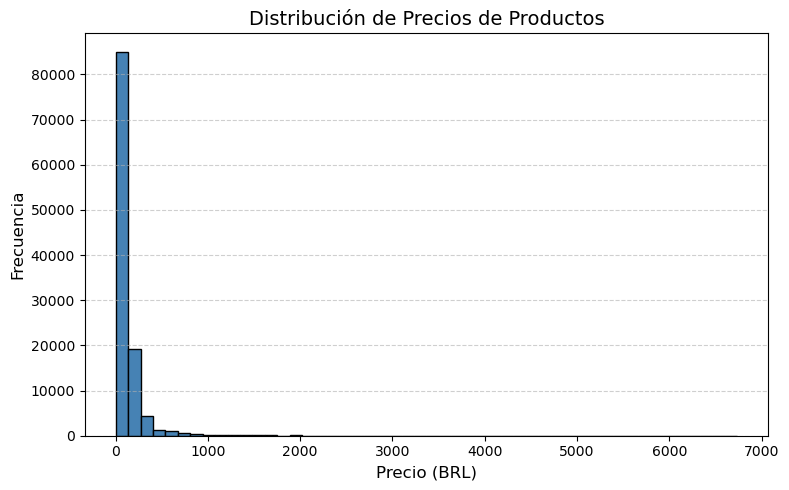

In [19]:
# Histograma de precios de productos
plt.figure(figsize=(8,5))
plt.hist(order_items_df['price'], bins=50, color='steelblue', edgecolor='black')
plt.title('Distribución de Precios de Productos', fontsize=14)
plt.xlabel('Precio (BRL)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


La mayoría de los productos tienen precios bajos, concentrados principalmente entre 0 y 500 reales brasileños (BRL). Se observa una alta frecuencia de productos con precios pequeños, lo que sugiere que la plataforma maneja principalmente artículos de bajo costo.

Sin embargo, existen productos con precios significativamente más altos, evidenciados por la larga cola a la derecha del histograma. Estos precios extremos representan outliers y podrían corresponder a productos de lujo o de categorías especiales.

#### **Distribución de valores de pago**

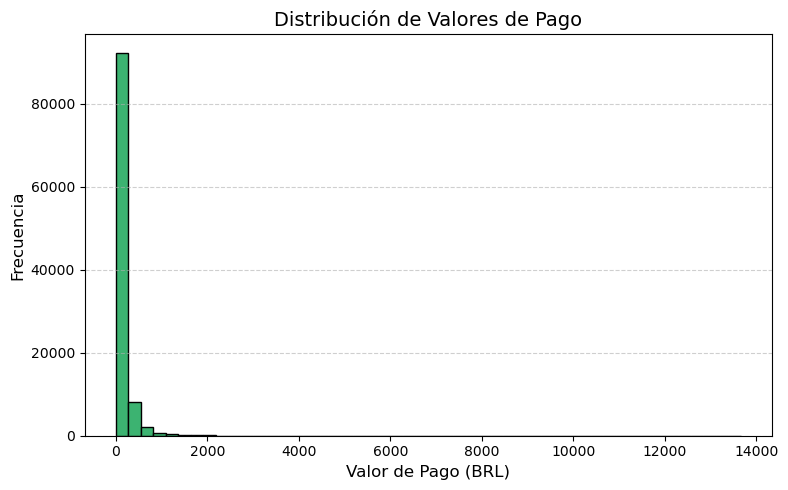

In [20]:
# Histograma de valores de pago
plt.figure(figsize=(8,5))
plt.hist(order_payments_df['payment_value'], bins=50, color='mediumseagreen', edgecolor='black')
plt.title('Distribución de Valores de Pago', fontsize=14)
plt.xlabel('Valor de Pago (BRL)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

La mayoría de los valores de pago están concentrados en montos bajos, principalmente por debajo de los 500 BRL. Esto refleja que la mayoría de las transacciones en la plataforma Olist involucran pagos accesibles para los usuarios.

Al igual que con los precios de productos, se observan algunos pagos significativamente altos, aunque representan una proporción mínima del total. Estos outliers podrían estar asociados a compras de productos de alto valor o múltiples productos en un solo pedido.

### Visualización de Patrones Clave

#### **Distribución de métodos de pago**

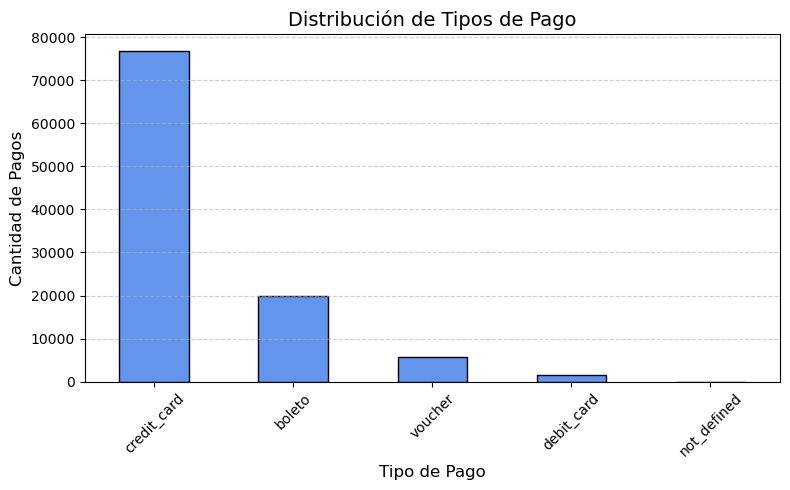

In [ ]:
# Tipos de Pago
order_payments_df['payment_type'].value_counts().plot(kind='bar', color='cornflowerblue', edgecolor='black', figsize=(8,5))
plt.title('Distribución de Métodos de Pago', fontsize=14)
plt.xlabel('Tipo de Pago', fontsize=12)
plt.ylabel('Cantidad de Pagos', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

La mayoría de los clientes prefieren utilizar tarjeta de crédito como método de pago en la plataforma Olist, seguida por boleto bancario y voucher. Esto sugiere que los usuarios tienen una alta preferencia por métodos de pago electrónicos rápidos y seguros. Los métodos menos utilizados son tarjeta de débito y opciones no definidas, lo cual indica que otras formas de pago tienen una participación marginal en el total de las transacciones.

#### **Distribución de estados de órdenes**

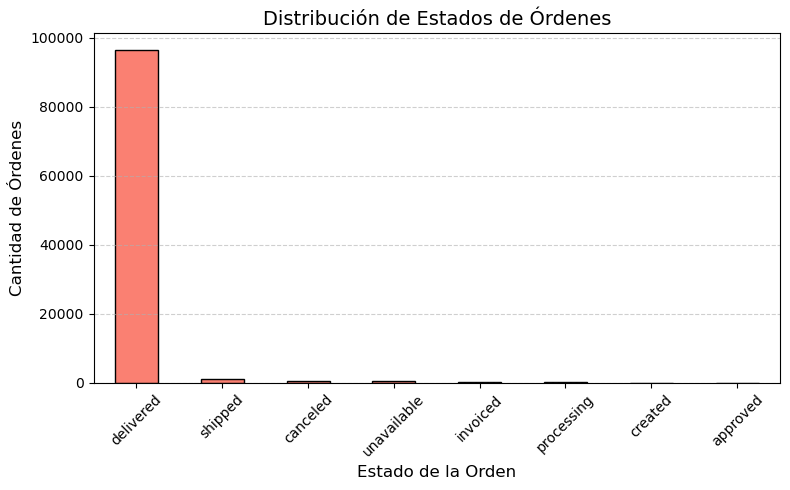

In [22]:
# Estados de las órdenes
orders_df['order_status'].value_counts().plot(kind='bar', color='salmon', edgecolor='black', figsize=(8,5))
plt.title('Distribución de Estados de Órdenes', fontsize=14)
plt.xlabel('Estado de la Orden', fontsize=12)
plt.ylabel('Cantidad de Órdenes', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


La mayoría de las órdenes en la plataforma se encuentran en estado "delivered" (entregado), indicando un proceso de venta exitoso y cumplimiento en las entregas. Sin embargo, también se observan algunas órdenes en estado "canceled" (cancelado) y "unavailable" (no disponible), lo que sugiere oportunidades de mejora en la gestión de inventario y atención al cliente para reducir el porcentaje de pedidos no completados.  

Los estados como "shipped", "processing" y "invoiced" representan etapas intermedias dentro del flujo de procesamiento de pedidos.


#### **Distribución de calificaciones de clientes**

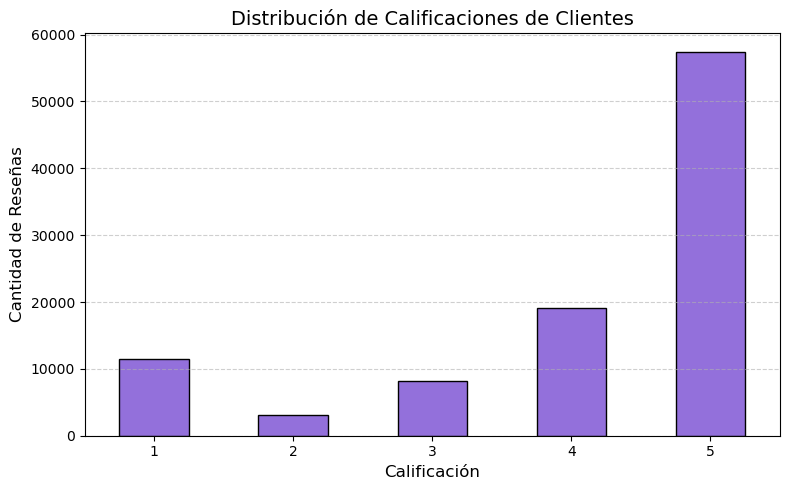

In [23]:
# Calificaciones de reseñas
order_reviews_df['review_score'].value_counts().sort_index().plot(kind='bar', color='mediumpurple', edgecolor='black', figsize=(8,5))
plt.title('Distribución de Calificaciones de Clientes', fontsize=14)
plt.xlabel('Calificación', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

La mayoría de los clientes otorgan calificaciones de 5 estrellas, indicando un alto nivel de satisfacción con los productos y servicios recibidos. Sin embargo, también se observa una cantidad significativa de calificaciones de 1 estrella, lo que refleja que existe un grupo de clientes que tuvo experiencias negativas. Además, la distribución muestra que las opiniones tienden a ser polarizadas, concentrándose principalmente en los extremos de satisfacción (1 y 5 estrellas).

### Análisis de correlación de características

In [7]:
# Código para visualizar correlación entre carecterísitcas

## **Dataset final**

In [8]:
# Código para juntar los datasets en uno solo basándose en los campos vistos anteriormente
# Analizar la información por si es necesario eliminar, renombrar o cambiar cualquier columna.
# Dejar bien balanceado el dataset y demostrar que esté preprocesado correctamente.